# Part of Speech (POS) Tagging

---

## Table of Contents
1. [Introduction to POS Tagging](#introduction)
2. [Understanding POS Tags](#understanding-tags)
3. [Penn Treebank Tag Set](#penn-treebank)
4. [POS Tagging with NLTK](#nltk-tagging)
5. [POS Tagging with spaCy](#spacy-tagging)
6. [Applications of POS Tagging](#applications)
7. [Advanced Topics](#advanced)
8. [Real-World Examples](#real-world)

---

## 1. Introduction to POS Tagging <a id='introduction'></a>

**Part of Speech (POS) Tagging** is the process of assigning grammatical categories (tags) to words in a sentence.

### What is a POS Tag?

A POS tag identifies the grammatical role of a word:
- **Noun**: Person, place, or thing (e.g., "cat", "London")
- **Verb**: Action or state (e.g., "run", "is")
- **Adjective**: Describes a noun (e.g., "beautiful", "red")
- **Adverb**: Modifies a verb/adjective (e.g., "quickly", "very")
- **Pronoun**: Replaces a noun (e.g., "he", "they")
- **Preposition**: Shows relationship (e.g., "on", "in", "at")

### Example:

```
Sentence: "The quick brown fox jumps over the lazy dog"

Word     POS Tag      Meaning
----     -------      -------
The      DT          Determiner
quick    JJ          Adjective
brown    JJ          Adjective
fox      NN          Noun (singular)
jumps    VBZ         Verb (3rd person singular present)
over     IN          Preposition
the      DT          Determiner
lazy     JJ          Adjective
dog      NN          Noun (singular)
```

### Why is POS Tagging Important?

1. **Word Sense Disambiguation**
   - "book" as noun: "I read a book"
   - "book" as verb: "I will book a ticket"

2. **Text-to-Speech Systems**
   - Pronunciation depends on POS (e.g., "lead" as noun vs verb)

3. **Information Extraction**
   - Extract entities (nouns) and actions (verbs)

4. **Improved Lemmatization**
   - POS helps choose correct lemma ("better" → "good" when adjective)

5. **Grammar Checking**
   - Identify grammatical errors

In [1]:
# Setup: Import necessary libraries
import nltk
import spacy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# NLTK imports
from nltk import pos_tag, word_tokenize
from nltk.corpus import treebank

# Download required NLTK data
nltk.download('punkt', quiet=True)
nltk.download('punkt_tab', quiet=True)
nltk.download('averaged_perceptron_tagger', quiet=True)
nltk.download('averaged_perceptron_tagger_eng', quiet=True)
nltk.download('tagsets', quiet=True)
nltk.download('treebank', quiet=True)

# Load spaCy model
nlp = spacy.load('en_core_web_sm')

print("✓ All libraries imported successfully!")

✓ All libraries imported successfully!


## 2. Understanding POS Tags <a id='understanding-tags'></a>

Different tagsets exist for POS tagging. The most common are:

1. **Penn Treebank Tag Set** (NLTK default)
2. **Universal POS Tags** (spaCy default)
3. **Brown Corpus Tag Set**

### Major POS Categories:

| Category | Examples | Description |
|----------|----------|-------------|
| **Noun** | cat, London, idea | Person, place, thing, or concept |
| **Verb** | run, is, have, think | Action or state of being |
| **Adjective** | big, red, happy | Describes or modifies a noun |
| **Adverb** | quickly, very, well | Modifies verb, adjective, or adverb |
| **Pronoun** | I, you, he, it | Replaces a noun |
| **Preposition** | in, on, at, with | Shows relationship between words |
| **Conjunction** | and, but, or | Connects words or clauses |
| **Determiner** | the, a, an, this | Introduces a noun |
| **Interjection** | oh, wow, ouch | Expresses emotion |

## 3. Penn Treebank Tag Set <a id='penn-treebank'></a>

The Penn Treebank tag set has **36 POS tags** and **12 other tags** (for punctuation and symbols).

### Common Penn Treebank Tags:

#### Nouns:
- **NN**: Noun, singular (e.g., "dog", "car")
- **NNS**: Noun, plural (e.g., "dogs", "cars")
- **NNP**: Proper noun, singular (e.g., "John", "London")
- **NNPS**: Proper noun, plural (e.g., "Americans")

#### Verbs:
- **VB**: Verb, base form (e.g., "run", "eat")
- **VBD**: Verb, past tense (e.g., "ran", "ate")
- **VBG**: Verb, gerund/present participle (e.g., "running", "eating")
- **VBN**: Verb, past participle (e.g., "run", "eaten")
- **VBP**: Verb, present tense, non-3rd person (e.g., "run", "eat")
- **VBZ**: Verb, present tense, 3rd person (e.g., "runs", "eats")

#### Adjectives:
- **JJ**: Adjective (e.g., "big", "beautiful")
- **JJR**: Adjective, comparative (e.g., "bigger", "better")
- **JJS**: Adjective, superlative (e.g., "biggest", "best")

#### Adverbs:
- **RB**: Adverb (e.g., "quickly", "very")
- **RBR**: Adverb, comparative (e.g., "faster")
- **RBS**: Adverb, superlative (e.g., "fastest")

#### Others:
- **DT**: Determiner (e.g., "the", "a", "an")
- **IN**: Preposition/subordinating conjunction (e.g., "in", "of", "because")
- **CC**: Coordinating conjunction (e.g., "and", "but", "or")
- **PRP**: Personal pronoun (e.g., "I", "you", "he")
- **PRP$**: Possessive pronoun (e.g., "my", "your", "his")
- **WH**: Wh-words (e.g., "who", "what", "where")

In [3]:
import nltk
nltk.download('tagsets_json')

[nltk_data] Downloading package tagsets_json to
[nltk_data]     /Users/sourangshupal/nltk_data...
[nltk_data]   Unzipping help/tagsets_json.zip.


True

In [4]:
# View all Penn Treebank tags

# Get help for specific tag
nltk.help.upenn_tagset('NN')  # Noun, singular
print("\n" + "="*60 + "\n")

nltk.help.upenn_tagset('VB')  # Verb, base form
print("\n" + "="*60 + "\n")

nltk.help.upenn_tagset('JJ')  # Adjective

NN: noun, common, singular or mass
    common-carrier cabbage knuckle-duster Casino afghan shed thermostat
    investment slide humour falloff slick wind hyena override subhumanity
    machinist ...


VB: verb, base form
    ask assemble assess assign assume atone attention avoid bake balkanize
    bank begin behold believe bend benefit bevel beware bless boil bomb
    boost brace break bring broil brush build ...


JJ: adjective or numeral, ordinal
    third ill-mannered pre-war regrettable oiled calamitous first separable
    ectoplasmic battery-powered participatory fourth still-to-be-named
    multilingual multi-disciplinary ...


In [5]:
# Create a comprehensive tag reference

# Common tags with examples
tag_reference = {
    'Nouns': [
        ('NN', 'Noun, singular', 'dog, car, idea'),
        ('NNS', 'Noun, plural', 'dogs, cars, ideas'),
        ('NNP', 'Proper noun, singular', 'John, London, Google'),
        ('NNPS', 'Proper noun, plural', 'Americans, Smiths'),
    ],
    'Verbs': [
        ('VB', 'Verb, base form', 'run, eat, go'),
        ('VBD', 'Verb, past tense', 'ran, ate, went'),
        ('VBG', 'Verb, gerund', 'running, eating, going'),
        ('VBN', 'Verb, past participle', 'run, eaten, gone'),
        ('VBP', 'Verb, non-3rd person', 'run, eat, go'),
        ('VBZ', 'Verb, 3rd person', 'runs, eats, goes'),
    ],
    'Adjectives': [
        ('JJ', 'Adjective', 'big, beautiful, happy'),
        ('JJR', 'Adjective, comparative', 'bigger, better'),
        ('JJS', 'Adjective, superlative', 'biggest, best'),
    ],
    'Adverbs': [
        ('RB', 'Adverb', 'quickly, very, well'),
        ('RBR', 'Adverb, comparative', 'faster, better'),
        ('RBS', 'Adverb, superlative', 'fastest, best'),
    ],
    'Others': [
        ('DT', 'Determiner', 'the, a, an, this'),
        ('IN', 'Preposition/Conjunction', 'in, of, because'),
        ('CC', 'Coordinating conjunction', 'and, but, or'),
        ('PRP', 'Personal pronoun', 'I, you, he, she'),
        ('PRP$', 'Possessive pronoun', 'my, your, his'),
    ]
}

print("Penn Treebank POS Tag Reference:\n")
print("="*80)

for category, tags in tag_reference.items():
    print(f"\n{category}:")
    print("-" * 80)
    for tag, description, examples in tags:
        print(f"  {tag:<8} {description:<30} Examples: {examples}")

Penn Treebank POS Tag Reference:


Nouns:
--------------------------------------------------------------------------------
  NN       Noun, singular                 Examples: dog, car, idea
  NNS      Noun, plural                   Examples: dogs, cars, ideas
  NNP      Proper noun, singular          Examples: John, London, Google
  NNPS     Proper noun, plural            Examples: Americans, Smiths

Verbs:
--------------------------------------------------------------------------------
  VB       Verb, base form                Examples: run, eat, go
  VBD      Verb, past tense               Examples: ran, ate, went
  VBG      Verb, gerund                   Examples: running, eating, going
  VBN      Verb, past participle          Examples: run, eaten, gone
  VBP      Verb, non-3rd person           Examples: run, eat, go
  VBZ      Verb, 3rd person               Examples: runs, eats, goes

Adjectives:
--------------------------------------------------------------------------------
  JJ

## 4. POS Tagging with NLTK <a id='nltk-tagging'></a>

NLTK provides the `pos_tag()` function for POS tagging using the Penn Treebank tag set.

In [6]:
# Basic POS tagging example

sentence = "The quick brown fox jumps over the lazy dog"

print(f"Sentence: '{sentence}'\n")
print("="*60)

# Step 1: Tokenize
tokens = word_tokenize(sentence)
print(f"\nTokens: {tokens}")

# Step 2: POS Tag
pos_tags = pos_tag(tokens)
print(f"\nPOS Tags: {pos_tags}")

# Display in a formatted way
print("\n" + "="*60)
print(f"\n{'Word':<15} {'POS Tag':<10} {'Description'}")
print("-"*60)

for word, tag in pos_tags:
    # Get tag description (simplified)
    tag_descriptions = {
        'DT': 'Determiner',
        'JJ': 'Adjective',
        'NN': 'Noun (singular)',
        'NNS': 'Noun (plural)',
        'VBZ': 'Verb (3rd person)',
        'VB': 'Verb (base form)',
        'IN': 'Preposition',
    }
    description = tag_descriptions.get(tag, tag)
    print(f"{word:<15} {tag:<10} {description}")

Sentence: 'The quick brown fox jumps over the lazy dog'


Tokens: ['The', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog']

POS Tags: [('The', 'DT'), ('quick', 'JJ'), ('brown', 'NN'), ('fox', 'NN'), ('jumps', 'VBZ'), ('over', 'IN'), ('the', 'DT'), ('lazy', 'JJ'), ('dog', 'NN')]


Word            POS Tag    Description
------------------------------------------------------------
The             DT         Determiner
quick           JJ         Adjective
brown           NN         Noun (singular)
fox             NN         Noun (singular)
jumps           VBZ        Verb (3rd person)
over            IN         Preposition
the             DT         Determiner
lazy            JJ         Adjective
dog             NN         Noun (singular)


In [7]:
# More complex sentences

sentences = [
    "I love natural language processing",
    "She is studying machine learning at Stanford University",
    "The researchers published their findings yesterday",
    "Can you help me understand this concept better?"
]

print("POS Tagging Multiple Sentences:\n")
print("="*80)

for i, sentence in enumerate(sentences, 1):
    print(f"\n{i}. {sentence}")
    
    tokens = word_tokenize(sentence)
    pos_tags = pos_tag(tokens)
    
    # Format output
    tagged_str = ' '.join([f"{word}/{tag}" for word, tag in pos_tags])
    print(f"   {tagged_str}")
    print("-"*80)

POS Tagging Multiple Sentences:


1. I love natural language processing
   I/PRP love/VBP natural/JJ language/NN processing/NN
--------------------------------------------------------------------------------

2. She is studying machine learning at Stanford University
   She/PRP is/VBZ studying/VBG machine/NN learning/NN at/IN Stanford/NNP University/NNP
--------------------------------------------------------------------------------

3. The researchers published their findings yesterday
   The/DT researchers/NNS published/VBD their/PRP$ findings/NNS yesterday/NN
--------------------------------------------------------------------------------

4. Can you help me understand this concept better?
   Can/MD you/PRP help/VB me/PRP understand/VB this/DT concept/NN better/RBR ?/.
--------------------------------------------------------------------------------


In [8]:
# Ambiguous words: Same word, different POS tags

ambiguous_sentences = [
    "I can open the can",  # 'can' as modal verb and noun
    "They book the hotel and read a book",  # 'book' as verb and noun
    "The lead actress was in the lead",  # 'lead' as adjective and noun
    "Time flies like an arrow",  # Classic ambiguous sentence
]

print("Word Sense Disambiguation through POS Tagging:\n")
print("="*80)

for sentence in ambiguous_sentences:
    print(f"\nSentence: '{sentence}'")
    
    tokens = word_tokenize(sentence)
    pos_tags = pos_tag(tokens)
    
    print("POS Tags:")
    for word, tag in pos_tags:
        print(f"  {word:<10} → {tag}")
    print("-"*80)

Word Sense Disambiguation through POS Tagging:


Sentence: 'I can open the can'
POS Tags:
  I          → PRP
  can        → MD
  open       → VB
  the        → DT
  can        → MD
--------------------------------------------------------------------------------

Sentence: 'They book the hotel and read a book'
POS Tags:
  They       → PRP
  book       → NN
  the        → DT
  hotel      → NN
  and        → CC
  read       → VB
  a          → DT
  book       → NN
--------------------------------------------------------------------------------

Sentence: 'The lead actress was in the lead'
POS Tags:
  The        → DT
  lead       → NN
  actress    → NN
  was        → VBD
  in         → IN
  the        → DT
  lead       → NN
--------------------------------------------------------------------------------

Sentence: 'Time flies like an arrow'
POS Tags:
  Time       → NNP
  flies      → NNS
  like       → IN
  an         → DT
  arrow      → NN
-------------------------------------------------

Analyzing POS Tag Distribution:

Text: Natural language processing is a subfield of artificial intelligence 
that focuses on the interactio...

POS Tag Distribution:
POS Tag  Count  Percentage
     NN     13       20.97
     IN      9       14.52
     JJ      7       11.29
    NNS      5        8.06
    VBZ      4        6.45
     DT      4        6.45
      .      3        4.84
     VB      3        4.84
      ,      3        4.84
    WDT      2        3.23
     CC      2        3.23
    NNP      2        3.23
     TO      2        3.23
     RB      1        1.61
    JJS      1        1.61
    VBP      1        1.61


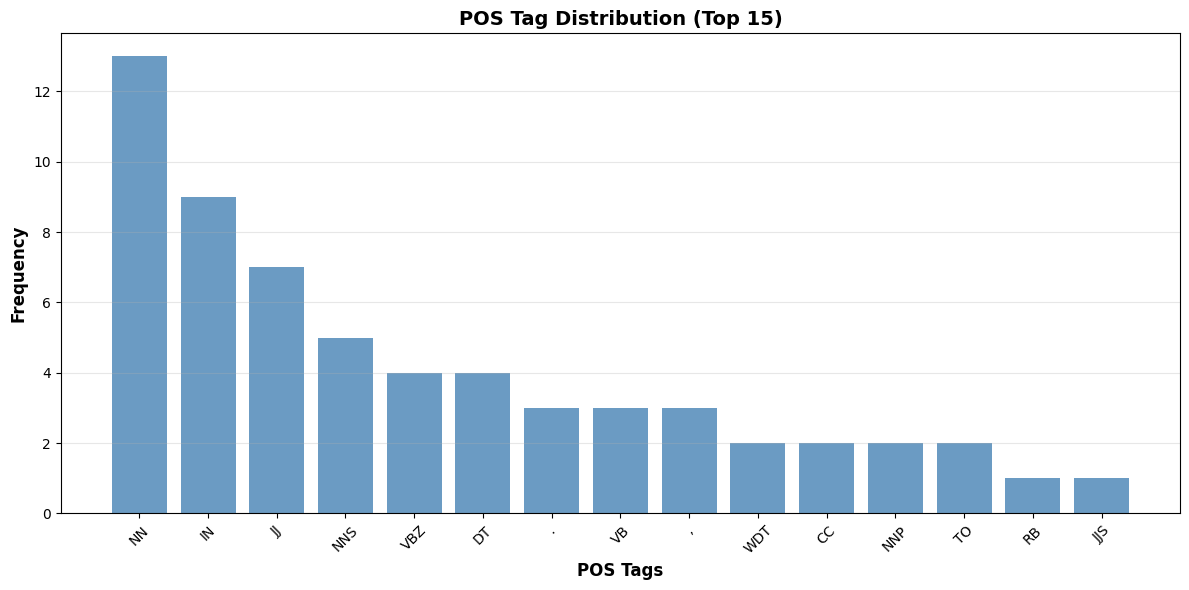

In [9]:
# Analyze POS tag distribution in a paragraph

paragraph = """Natural language processing is a subfield of artificial intelligence 
that focuses on the interaction between computers and humans through natural language. 
The ultimate objective of NLP is to read, decipher, understand, and make sense of human 
languages in a manner that is valuable. Most NLP techniques rely on machine learning to 
derive meaning from human languages."""

print("Analyzing POS Tag Distribution:\n")
print("="*80)
print(f"Text: {paragraph[:100]}...\n")

# Tokenize and tag
tokens = word_tokenize(paragraph)
pos_tags = pos_tag(tokens)

# Count tag frequencies
tag_counts = Counter([tag for word, tag in pos_tags])

# Create DataFrame
df_tags = pd.DataFrame(tag_counts.most_common(), columns=['POS Tag', 'Count'])
df_tags['Percentage'] = (df_tags['Count'] / len(pos_tags) * 100).round(2)

print("POS Tag Distribution:")
print(df_tags.to_string(index=False))

# Visualize
plt.figure(figsize=(12, 6))
plt.bar(df_tags['POS Tag'][:15], df_tags['Count'][:15], color='steelblue', alpha=0.8)
plt.xlabel('POS Tags', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')
plt.title('POS Tag Distribution (Top 15)', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

## 5. POS Tagging with spaCy <a id='spacy-tagging'></a>

spaCy provides more detailed POS tags with additional linguistic features.

In [10]:
# POS tagging with spaCy

sentence = "The quick brown fox jumps over the lazy dog"

# Process with spaCy
doc = nlp(sentence)

print(f"Sentence: '{sentence}'\n")
print("="*80)
print(f"\n{'Token':<15} {'POS (Simple)':<15} {'POS (Detailed)':<15} {'Dependency'}")
print("-"*80)

for token in doc:
    print(f"{token.text:<15} {token.pos_:<15} {token.tag_:<15} {token.dep_}")

print("\nKey:")
print("  POS (Simple): Universal POS tags (coarse-grained)")
print("  POS (Detailed): Penn Treebank tags (fine-grained)")
print("  Dependency: Syntactic role in the sentence")

Sentence: 'The quick brown fox jumps over the lazy dog'


Token           POS (Simple)    POS (Detailed)  Dependency
--------------------------------------------------------------------------------
The             DET             DT              det
quick           ADJ             JJ              amod
brown           ADJ             JJ              amod
fox             NOUN            NN              nsubj
jumps           VERB            VBZ             ROOT
over            ADP             IN              prep
the             DET             DT              det
lazy            ADJ             JJ              amod
dog             NOUN            NN              pobj

Key:
  POS (Simple): Universal POS tags (coarse-grained)
  POS (Detailed): Penn Treebank tags (fine-grained)
  Dependency: Syntactic role in the sentence


In [11]:
# Compare NLTK vs spaCy

test_sentences = [
    "She sells seashells by the seashore",
    "The old man the boats",  # Garden path sentence
    "I saw her duck",  # Ambiguous
]

print("NLTK vs spaCy POS Tagging Comparison:\n")
print("="*80)

for sentence in test_sentences:
    print(f"\nSentence: '{sentence}'\n")
    
    # NLTK tagging
    nltk_tokens = word_tokenize(sentence)
    nltk_tags = pos_tag(nltk_tokens)
    
    # spaCy tagging
    spacy_doc = nlp(sentence)
    spacy_tags = [(token.text, token.tag_) for token in spacy_doc]
    
    # Display comparison
    print(f"{'Word':<15} {'NLTK':<10} {'spaCy':<10}")
    print("-"*40)
    
    for i, word in enumerate(nltk_tokens):
        nltk_tag = nltk_tags[i][1]
        spacy_tag = spacy_tags[i][1]
        match = "✓" if nltk_tag == spacy_tag else "✗"
        print(f"{word:<15} {nltk_tag:<10} {spacy_tag:<10} {match}")
    
    print("-"*80)

NLTK vs spaCy POS Tagging Comparison:


Sentence: 'She sells seashells by the seashore'

Word            NLTK       spaCy     
----------------------------------------
She             PRP        PRP        ✓
sells           VBZ        VBZ        ✓
seashells       NNS        NNS        ✓
by              IN         IN         ✓
the             DT         DT         ✓
seashore        NN         NN         ✓
--------------------------------------------------------------------------------

Sentence: 'The old man the boats'

Word            NLTK       spaCy     
----------------------------------------
The             DT         DT         ✓
old             JJ         JJ         ✓
man             NN         NN         ✓
the             DT         DT         ✓
boats           NNS        NNS        ✓
--------------------------------------------------------------------------------

Sentence: 'I saw her duck'

Word            NLTK       spaCy     
----------------------------------------
I      

## 6. Applications of POS Tagging <a id='applications'></a>

POS tagging is fundamental to many NLP tasks.

### Application 1: Extracting Specific Word Types

Extract all nouns, verbs, or adjectives from text.

In [12]:
# Extract specific POS categories

text = """Apple Inc. is an American multinational technology company headquartered 
in Cupertino, California. The company designs, develops and sells consumer electronics, 
computer software, and online services. It is considered one of the Big Five companies 
in the U.S. information technology industry."""

# Tokenize and tag
tokens = word_tokenize(text)
pos_tags = pos_tag(tokens)

# Extract different categories
nouns = [word for word, tag in pos_tags if tag.startswith('NN')]
verbs = [word for word, tag in pos_tags if tag.startswith('VB')]
adjectives = [word for word, tag in pos_tags if tag.startswith('JJ')]
proper_nouns = [word for word, tag in pos_tags if tag in ['NNP', 'NNPS']]

print("Extracting Specific Word Types:\n")
print("="*80)
print(f"\nText excerpt: {text[:100]}...\n")
print("-"*80)

print(f"\nNouns ({len(nouns)}):")
print(f"  {', '.join(set(nouns))}")

print(f"\nProper Nouns ({len(proper_nouns)}):")
print(f"  {', '.join(proper_nouns)}")

print(f"\nVerbs ({len(verbs)}):")
print(f"  {', '.join(set(verbs))}")

print(f"\nAdjectives ({len(adjectives)}):")
print(f"  {', '.join(set(adjectives))}")

Extracting Specific Word Types:


Text excerpt: Apple Inc. is an American multinational technology company headquartered 
in Cupertino, California. ...

--------------------------------------------------------------------------------

Nouns (21):
  company, develops, California, companies, Apple, electronics, U.S., Cupertino, industry, multinational, software, services, consumer, Inc., information, computer, online, technology, Big

Proper Nouns (6):
  Apple, Inc., Cupertino, California, Big, U.S.

Verbs (6):
  is, sells, designs, headquartered, considered

Adjectives (1):
  American


### Application 2: Improved Lemmatization

Use POS tags for better lemmatization.

In [13]:
# POS-aware lemmatization

from nltk.stem import WordNetLemmatizer
nltk.download('wordnet', quiet=True)
nltk.download('omw-1.4', quiet=True)

lemmatizer = WordNetLemmatizer()

def get_wordnet_pos(treebank_tag):
    """
    Convert Penn Treebank tag to WordNet POS tag.
    """
    if treebank_tag.startswith('J'):
        return 'a'  # adjective
    elif treebank_tag.startswith('V'):
        return 'v'  # verb
    elif treebank_tag.startswith('N'):
        return 'n'  # noun
    elif treebank_tag.startswith('R'):
        return 'r'  # adverb
    else:
        return 'n'  # default to noun

# Test sentence
sentence = "The striped bats are hanging on their feet for best results"

tokens = word_tokenize(sentence)
pos_tags = pos_tag(tokens)

print("POS-Aware Lemmatization:\n")
print("="*80)
print(f"Original: {sentence}\n")

print(f"{'Token':<15} {'POS':<10} {'Without POS':<20} {'With POS':<20}")
print("-"*70)

for word, pos in pos_tags:
    # Lemmatize without POS
    lemma_no_pos = lemmatizer.lemmatize(word.lower())
    
    # Lemmatize with POS
    wordnet_pos = get_wordnet_pos(pos)
    lemma_with_pos = lemmatizer.lemmatize(word.lower(), wordnet_pos)
    
    # Highlight differences
    diff = "*" if lemma_no_pos != lemma_with_pos else ""
    
    print(f"{word:<15} {pos:<10} {lemma_no_pos:<20} {lemma_with_pos:<20} {diff}")

print("\n* = Different results with POS tagging")

POS-Aware Lemmatization:

Original: The striped bats are hanging on their feet for best results

Token           POS        Without POS          With POS            
----------------------------------------------------------------------
The             DT         the                  the                  
striped         JJ         striped              striped              
bats            NNS        bat                  bat                  
are             VBP        are                  be                   *
hanging         VBG        hanging              hang                 *
on              IN         on                   on                   
their           PRP$       their                their                
feet            NNS        foot                 foot                 
for             IN         for                  for                  
best            JJS        best                 best                 
results         NNS        result               result       

### Application 3: Extracting Noun Phrases

Identify meaningful phrases using POS patterns.

In [14]:
# Extract noun phrases using POS patterns
import re

def extract_noun_phrases(text):
    """
    Extract noun phrases using POS pattern matching.
    Pattern: (Adjective)* + Noun(s)
    """
    tokens = word_tokenize(text)
    pos_tags = pos_tag(tokens)
    
    noun_phrases = []
    current_phrase = []
    
    for word, tag in pos_tags:
        # If it's an adjective or noun, add to current phrase
        if tag.startswith('JJ') or tag.startswith('NN'):
            current_phrase.append(word)
        else:
            # End of phrase
            if current_phrase:
                # Only keep phrases with at least one noun
                phrase_tags = [t for w, t in pos_tags if w in current_phrase]
                if any(t.startswith('NN') for t in phrase_tags):
                    noun_phrases.append(' '.join(current_phrase))
                current_phrase = []
    
    # Handle last phrase
    if current_phrase:
        noun_phrases.append(' '.join(current_phrase))
    
    return noun_phrases

# Test text
text = """The artificial intelligence revolution is transforming modern technology. 
Advanced machine learning algorithms are being deployed in various real-world applications. 
Natural language processing enables computers to understand human language."""

phrases = extract_noun_phrases(text)

print("Extracted Noun Phrases:\n")
print("="*80)
print(f"Text: {text[:100]}...\n")
print("Noun Phrases Found:")
for i, phrase in enumerate(phrases, 1):
    print(f"  {i}. {phrase}")

Extracted Noun Phrases:

Text: The artificial intelligence revolution is transforming modern technology. 
Advanced machine learning...

Noun Phrases Found:
  1. artificial intelligence revolution
  2. modern technology
  3. Advanced machine
  4. algorithms
  5. various real-world applications
  6. Natural language processing
  7. computers
  8. human language


## 7. Advanced Topics <a id='advanced'></a>

### POS Tagging Accuracy

Modern POS taggers achieve ~97% accuracy, but challenges remain.

In [15]:
# Challenging sentences for POS tagging

challenging_sentences = [
    "Buffalo buffalo Buffalo buffalo buffalo buffalo Buffalo buffalo",  # Famous ambiguous sentence
    "Time flies like an arrow; fruit flies like a banana",  # Syntactic ambiguity
    "The old man the boats",  # Garden path sentence
    "I saw her duck under the table",  # Lexical ambiguity
]

print("Challenging Sentences for POS Tagging:\n")
print("="*80)

for i, sentence in enumerate(challenging_sentences, 1):
    print(f"\n{i}. {sentence}")
    
    tokens = word_tokenize(sentence)
    pos_tags = pos_tag(tokens)
    
    tagged = ' '.join([f"{w}/{t}" for w, t in pos_tags])
    print(f"   {tagged}")
    print("-"*80)

Challenging Sentences for POS Tagging:


1. Buffalo buffalo Buffalo buffalo buffalo buffalo Buffalo buffalo
   Buffalo/NNP buffalo/NN Buffalo/NNP buffalo/NN buffalo/NN buffalo/NN Buffalo/NNP buffalo/NN
--------------------------------------------------------------------------------

2. Time flies like an arrow; fruit flies like a banana
   Time/NNP flies/NNS like/IN an/DT arrow/NN ;/: fruit/CC flies/NNS like/IN a/DT banana/NN
--------------------------------------------------------------------------------

3. The old man the boats
   The/DT old/JJ man/NN the/DT boats/NNS
--------------------------------------------------------------------------------

4. I saw her duck under the table
   I/PRP saw/VBD her/PRP duck/NN under/IN the/DT table/NN
--------------------------------------------------------------------------------


### Custom POS Tag Filtering

In [16]:
# Create a flexible POS filter

def filter_by_pos(text, include_tags=None, exclude_tags=None):
    """
    Filter words based on POS tags.
    
    Args:
        text (str): Input text
        include_tags (list): List of tags to include (e.g., ['NN', 'NNS'])
        exclude_tags (list): List of tags to exclude
    
    Returns:
        list: Filtered words
    """
    tokens = word_tokenize(text)
    pos_tags = pos_tag(tokens)
    
    filtered = []
    for word, tag in pos_tags:
        # Check inclusion
        if include_tags:
            # Check if tag starts with any include pattern
            if any(tag.startswith(pattern) for pattern in include_tags):
                filtered.append(word)
        # Check exclusion
        elif exclude_tags:
            if not any(tag.startswith(pattern) for pattern in exclude_tags):
                filtered.append(word)
        else:
            filtered.append(word)
    
    return filtered

# Test text
text = "The beautiful sunset painted the sky with vibrant colors yesterday evening"

print("POS Tag Filtering Examples:\n")
print("="*80)
print(f"Original: {text}\n")

# Extract only nouns
nouns = filter_by_pos(text, include_tags=['NN'])
print(f"Nouns only: {' '.join(nouns)}")

# Extract adjectives
adjectives = filter_by_pos(text, include_tags=['JJ'])
print(f"Adjectives only: {' '.join(adjectives)}")

# Extract content words (exclude determiners, prepositions)
content = filter_by_pos(text, exclude_tags=['DT', 'IN'])
print(f"Content words: {' '.join(content)}")

POS Tag Filtering Examples:

Original: The beautiful sunset painted the sky with vibrant colors yesterday evening

Nouns only: sunset sky colors yesterday
Adjectives only: beautiful vibrant
Content words: beautiful sunset painted sky vibrant colors yesterday evening


## 8. Real-World Examples <a id='real-world'></a>

Let's apply POS tagging to real-world text analysis.

In [17]:
# Analyze writing style using POS tags

# Two texts with different styles
texts = {
    'Technical': """Machine learning algorithms utilize statistical techniques to enable 
    computer systems to progressively improve performance on specific tasks. Deep neural 
    networks represent hierarchical architectures that process complex patterns.""",
    
    'Narrative': """The young girl walked slowly through the ancient forest. Birds sang 
    sweetly in the tall trees. She felt incredibly peaceful and wonderfully happy."""
}

print("Writing Style Analysis Using POS Tags:\n")
print("="*80)

for style, text in texts.items():
    tokens = word_tokenize(text)
    pos_tags = pos_tag(tokens)
    
    # Count different POS categories
    total = len(pos_tags)
    nouns = sum(1 for w, t in pos_tags if t.startswith('NN'))
    verbs = sum(1 for w, t in pos_tags if t.startswith('VB'))
    adjectives = sum(1 for w, t in pos_tags if t.startswith('JJ'))
    adverbs = sum(1 for w, t in pos_tags if t.startswith('RB'))
    
    print(f"\n{style} Writing:")
    print("-"*60)
    print(f"Total words: {total}")
    print(f"Nouns: {nouns} ({nouns/total*100:.1f}%)")
    print(f"Verbs: {verbs} ({verbs/total*100:.1f}%)")
    print(f"Adjectives: {adjectives} ({adjectives/total*100:.1f}%)")
    print(f"Adverbs: {adverbs} ({adverbs/total*100:.1f}%)")
    
    # Calculate noun/verb ratio
    nv_ratio = nouns / verbs if verbs > 0 else 0
    print(f"Noun/Verb ratio: {nv_ratio:.2f}")

print("\n" + "="*80)
print("\nObservations:")
print("  - Technical writing: Higher noun ratio (more concepts/objects)")
print("  - Narrative writing: More verbs and adverbs (more action/description)")

Writing Style Analysis Using POS Tags:


Technical Writing:
------------------------------------------------------------
Total words: 29
Nouns: 11 (37.9%)
Verbs: 4 (13.8%)
Adjectives: 7 (24.1%)
Adverbs: 1 (3.4%)
Noun/Verb ratio: 2.75

Narrative Writing:
------------------------------------------------------------
Total words: 26
Nouns: 4 (15.4%)
Verbs: 3 (11.5%)
Adjectives: 5 (19.2%)
Adverbs: 4 (15.4%)
Noun/Verb ratio: 1.33


Observations:
  - Technical writing: Higher noun ratio (more concepts/objects)
  - Narrative writing: More verbs and adverbs (more action/description)


In [18]:
# Extract key information from product reviews

reviews = [
    "This phone has an amazing camera and excellent battery life!",
    "The screen quality is poor and it crashes frequently",
    "Fast performance, beautiful design, highly recommend"
]

print("Extracting Features and Opinions from Reviews:\n")
print("="*80)

for i, review in enumerate(reviews, 1):
    tokens = word_tokenize(review)
    pos_tags = pos_tag(tokens)
    
    # Extract nouns (potential product features)
    features = [w for w, t in pos_tags if t.startswith('NN')]
    
    # Extract adjectives (potential opinions)
    opinions = [w for w, t in pos_tags if t.startswith('JJ')]
    
    print(f"\nReview {i}: {review}")
    print(f"Features (nouns): {', '.join(features)}")
    print(f"Opinions (adjectives): {', '.join(opinions)}")
    print("-"*80)

Extracting Features and Opinions from Reviews:


Review 1: This phone has an amazing camera and excellent battery life!
Features (nouns): phone, camera, battery, life
Opinions (adjectives): amazing, excellent
--------------------------------------------------------------------------------

Review 2: The screen quality is poor and it crashes frequently
Features (nouns): screen, quality
Opinions (adjectives): poor
--------------------------------------------------------------------------------

Review 3: Fast performance, beautiful design, highly recommend
Features (nouns): Fast, performance, design
Opinions (adjectives): beautiful
--------------------------------------------------------------------------------


In [ ]:
# Visualize POS distribution comparison

import matplotlib.pyplot as plt

# Analyze two different text types
texts_compare = {
    'News Article': """The company announced record profits today. Investors reacted positively 
    to the strong quarterly earnings. The CEO praised the dedicated team.""",
    
    'Social Media': """OMG just watched the most amazing movie ever! Absolutely loved it! 
    The acting was incredible and the story was so beautiful!"""
}

# Analyze both texts
analysis = {}
for text_type, text in texts_compare.items():
    tokens = word_tokenize(text)
    pos_tags = pos_tag(tokens)
    
    # Get major categories
    total = len(pos_tags)
    analysis[text_type] = {
        'Nouns': sum(1 for w, t in pos_tags if t.startswith('NN')) / total * 100,
        'Verbs': sum(1 for w, t in pos_tags if t.startswith('VB')) / total * 100,
        'Adjectives': sum(1 for w, t in pos_tags if t.startswith('JJ')) / total * 100,
        'Adverbs': sum(1 for w, t in pos_tags if t.startswith('RB')) / total * 100,
    }

# Create comparison visualization
df_compare = pd.DataFrame(analysis).T

ax = df_compare.plot(kind='bar', figsize=(12, 6), width=0.8)
plt.title('POS Tag Distribution Comparison', fontsize=14, fontweight='bold')
plt.xlabel('Text Type', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='POS Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("\nPOS Distribution Comparison:")
print(df_compare.round(2))

## Summary

In this notebook, we covered:

✅ **Introduction to POS Tagging**: What it is and why it matters  
✅ **Penn Treebank Tag Set**: Understanding the 36 core POS tags  
✅ **POS Tagging with NLTK**: Using `pos_tag()` function  
✅ **POS Tagging with spaCy**: More detailed linguistic features  
✅ **Applications**: Word extraction, lemmatization, phrase detection  
✅ **Advanced Topics**: Handling ambiguity, custom filtering  
✅ **Real-World Examples**: Style analysis, review mining

### Key Takeaways:

1. **POS tagging is fundamental** to many NLP tasks
2. **Context matters** - same word can have different POS tags
3. **Modern taggers are accurate** (~97%) but not perfect
4. **Choose the right tool**:
   - NLTK: Good for learning and simple tasks
   - spaCy: Better for production and complex pipelines
5. **POS tags enable**:
   - Better preprocessing (POS-aware lemmatization)
   - Feature extraction (noun phrases, entities)
   - Text analysis (writing style, sentiment)

### Common POS Patterns:

- **Noun Phrase**: (DT)? (JJ)* (NN)+
  - Example: "the beautiful red car"
  
- **Verb Phrase**: (RB)? (VB) (RB)?
  - Example: "quickly running"
  
- **Prepositional Phrase**: (IN) (DT)? (NN)+
  - Example: "in the house"

---

**Next Notebook**: `04_Named_Entity_Recognition.ipynb` - Identifying and classifying named entities

---